In [10]:
import functools
import geopy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyproj
import requests
import scipy as sp
import rtree
import seaborn as sb
from scipy import signal
from statsmodels.tsa.arima_process import arma_generate_sample 
# import shapely
import shapely.geometry
%pylab inline
import data_munging

Populating the interactive namespace from numpy and matplotlib


In [55]:
length_road = 1000
x = np.array(range(1000))

In [11]:
help(arma_generate_sample)

Help on function arma_generate_sample in module statsmodels.tsa.arima_process:

arma_generate_sample(ar, ma, nsample, sigma=1, distrvs=<built-in method randn of mtrand.RandomState object>, burnin=0)
    Generate a random sample of an ARMA process
    
    Parameters
    ----------
    ar : array_like, 1d
        coefficient for autoregressive lag polynomial, including zero lag
    ma : array_like, 1d
        coefficient for moving-average lag polynomial, including zero lag
    nsample : int
        length of simulated time series
    sigma : float
        standard deviation of noise
    distrvs : function, random number generator
        function that generates the random numbers, and takes sample size
        as argument
        default: np.random.randn
        TODO: change to size argument
    burnin : integer (default: 0)
        to reduce the effect of initial conditions, burnin observations at the
        beginning of the sample are dropped
    
    Returns
    -------
    sample 

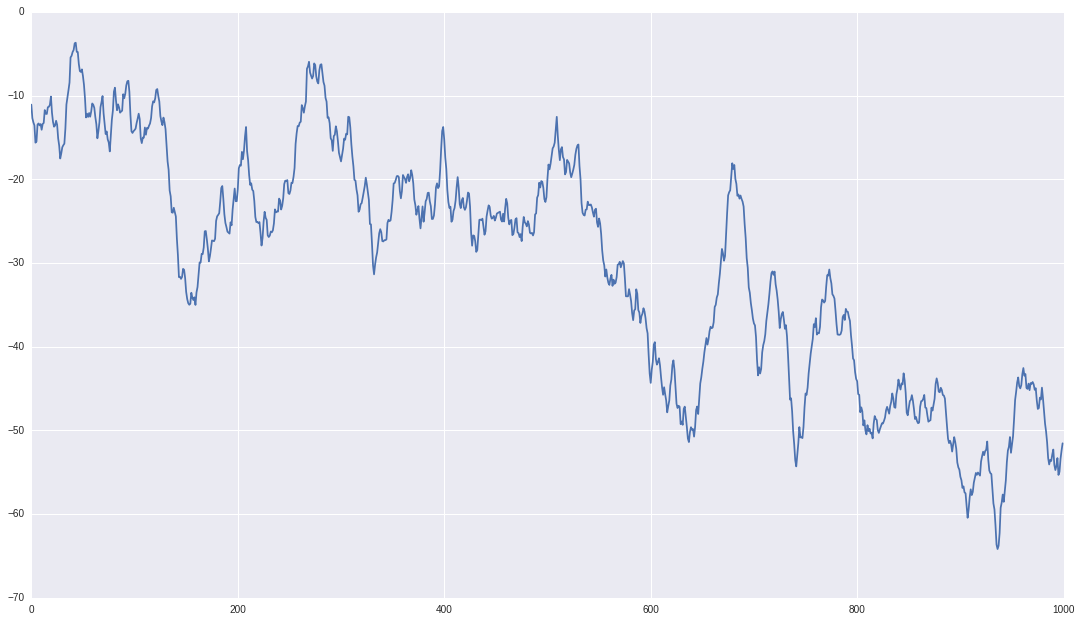

In [31]:
arparams = np.array([.75, .25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 1000, burnin=1000, sigma=1.0)
plt.plot(y)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [ ]:
plt.plot (x, y, 'bo', label='Data')
plt.plot (xx, s1(xx), 'k-', label='Spline, wrong order')
plt.plot (xx, s1rev(xx), 'k--', label='Spline, correct order')
plt.plot (xx, s2(xx), 'r-', label='Spline, fit')
# Uncomment to get the poor fit.
#plt.plot (xx, s2crazy(xx), 'r--', label='Spline, fit, s=5e8')
plt.minorticks_on()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

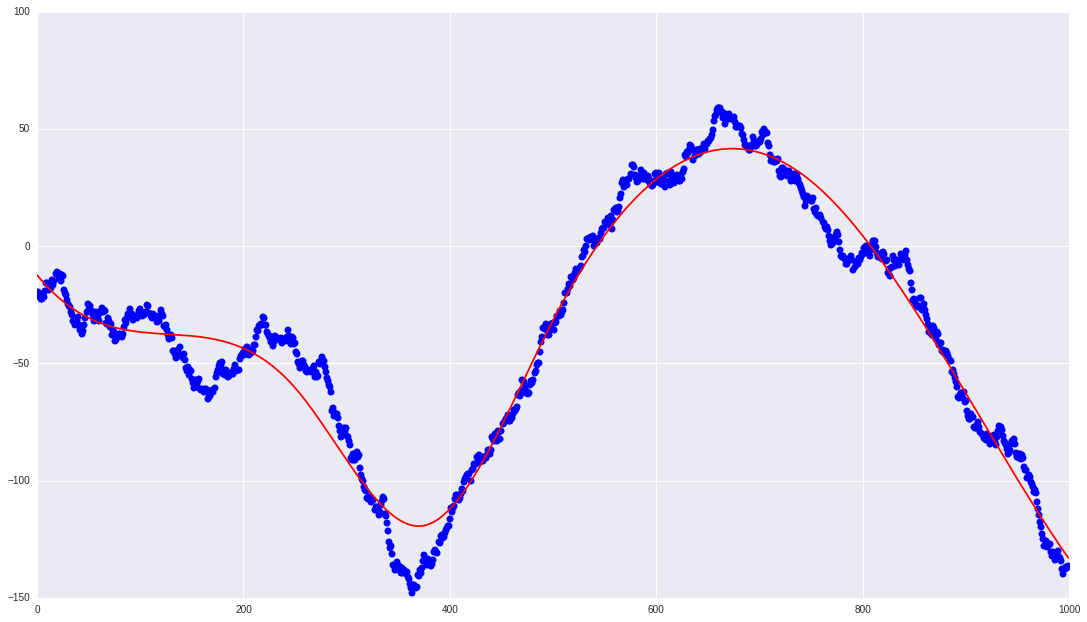

In [69]:
arparams = np.array([1.0])
maparams = np.array([.02] * 50)
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 1000, burnin=1000, sigma=2.0)
interp_y = sp.interpolate.UnivariateSpline(x=x,y=y, s=0)
interp_y.set_smoothing_factor(100000)
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, interp_y(x), 'r-', label='Spline')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

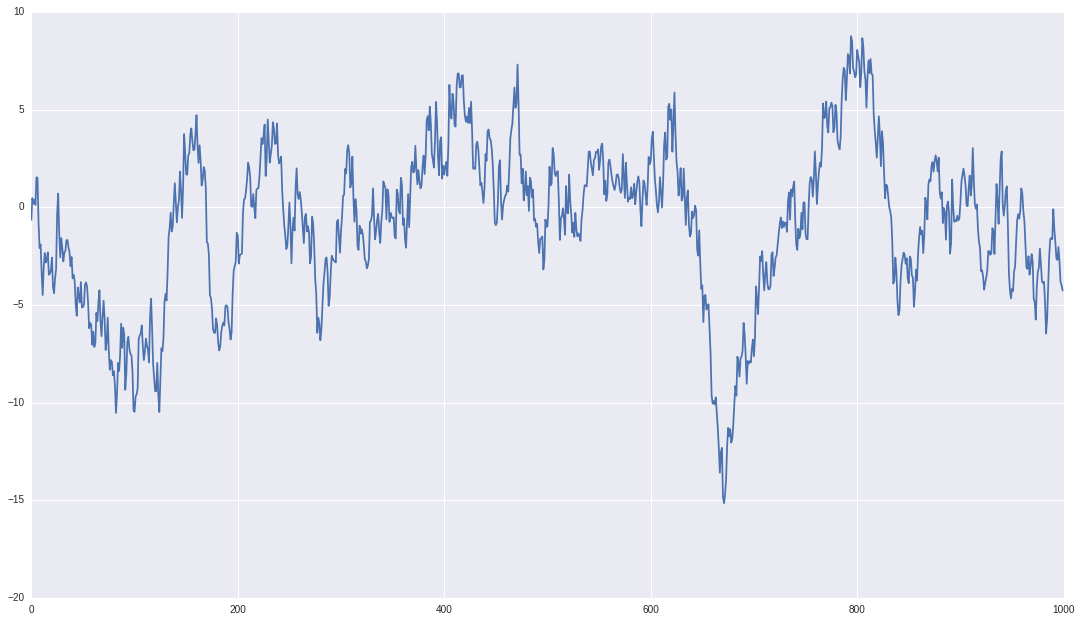

In [29]:
arparams = np.array([.40, .25, .20, .10])
maparams = np.array([.65, .10, .10, .10, .05])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 1000, burnin=1000)
plt.plot(y)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()